In [1]:
%matplotlib inline
import pandas as pd
import os
os.chdir('/Users/michaelcaruana/Desktop/pycon-pandas-tutorial')

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Fuera de la ley,1937
1,Element,2016
2,Jeomjaengyideul,2012
3,An kubo sa kawayanan,2015
4,Hirer Angti,1992


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

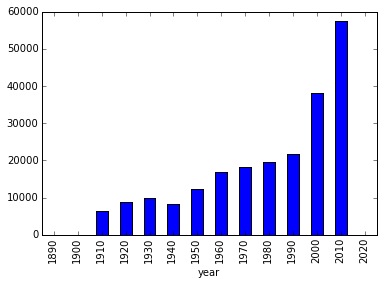

In [9]:
titles.groupby(titles.year // 10 * 10).size().plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

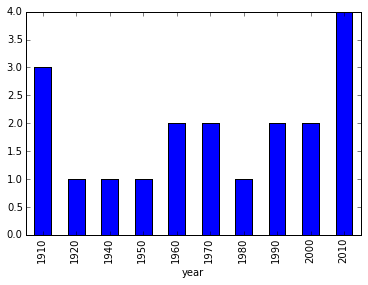

In [12]:
hamlet = titles[titles.title == 'Hamlet']
hamlet.groupby(hamlet.year // 10 * 10).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [14]:
lead = cast[(cast.year >= 1959) & (cast.year >= 1950) & (cast.n == 1)]
lead.groupby(['year','type']).size()

year  type   
1959  actor       687
      actress     299
1960  actor       690
      actress     289
1961  actor       733
      actress     309
1962  actor       755
      actress     271
1963  actor       686
      actress     318
1964  actor       784
      actress     278
1965  actor       807
      actress     311
1966  actor       807
      actress     324
1967  actor       852
      actress     364
1968  actor       879
      actress     367
1969  actor       877
      actress     378
1970  actor       922
      actress     376
1971  actor       883
      actress     348
1972  actor       862
      actress     390
1973  actor       923
      actress     364
                 ... 
2005  actor      1791
      actress     760
2006  actor      1946
      actress     854
2007  actor      2094
      actress     803
2008  actor      2217
      actress     936
2009  actor      2521
      actress    1064
2010  actor      2516
      actress    1005
2011  actor      2803
      actress    1

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [17]:
fifties = cast[(cast.year >= 1959) & (cast.year >= 1950) & (cast.n <= 5)]
fifties.groupby(['n','type']).size()

n  type   
1  actor      72871
   actress    29612
2  actor      52626
   actress    42632
3  actor      55106
   actress    34723
4  actor      52984
   actress    31772
5  actor      51853
   actress    27946
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [24]:
pinkpanther = cast[cast.title == 'The Pink Panther']
pinkpanther.groupby(['year'])['n'].size()

year
1963    19
2006    89
2016     1
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [29]:
oz = cast[cast.name == 'Frank Oz']
answer = oz.groupby(['year'])['title'].size()
answer[answer >1]

year
1979    8
1980    2
1981    8
1982    2
1983    3
1984    7
1985    4
1992    8
1996    4
1999    8
2005    2
2015    2
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [32]:
answer = oz.groupby(['character'])['title'].size()
answer[answer>1]

character
Animal            6
Bert              3
Cookie Monster    3
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64